In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset=pd.get_dummies(dataset)
dataset

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False
...,...,...,...,...,...,...
195,196,35,120,79,True,False
196,197,45,126,28,True,False
197,198,32,126,74,False,True
198,199,32,137,18,False,True


In [4]:
x=dataset.iloc[:,[3,4]].values

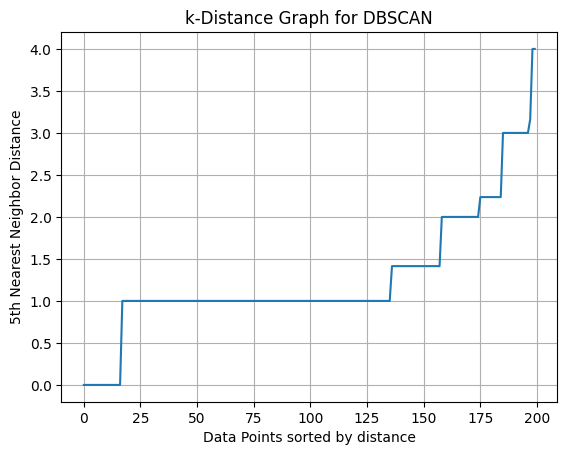

In [5]:
#graph
#using neighbors is to find the nearest data points 
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Fit NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5)  # 5 = min_samples
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)

# Step 2: Sort distances of the kth nearest neighbor
distances = np.sort(distances[:, 4])  # 4 = 5th neighbor (index starts at 0)

# Step 3: Plot the k-distance graph
#plt.figure(figsize=(4, 4))
plt.plot(distances)
plt.title('k-Distance Graph for DBSCAN')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.grid(True)
plt.show()

In [6]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=10,min_samples=6)
ydb=db.fit_predict(x)
ydb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [7]:
supervised=pd.DataFrame(dataset)
supervised['Cluster_group']=ydb

In [8]:
supervised

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,Cluster_group
0,1,19,15,39,False,True,0
1,2,21,15,81,False,True,0
2,3,20,16,6,True,False,0
3,4,23,16,77,True,False,0
4,5,31,17,40,True,False,0
...,...,...,...,...,...,...,...
195,196,35,120,79,True,False,0
196,197,45,126,28,True,False,0
197,198,32,126,74,False,True,0
198,199,32,137,18,False,True,0


C:\Users\USER\anaconda3\envs\aiml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


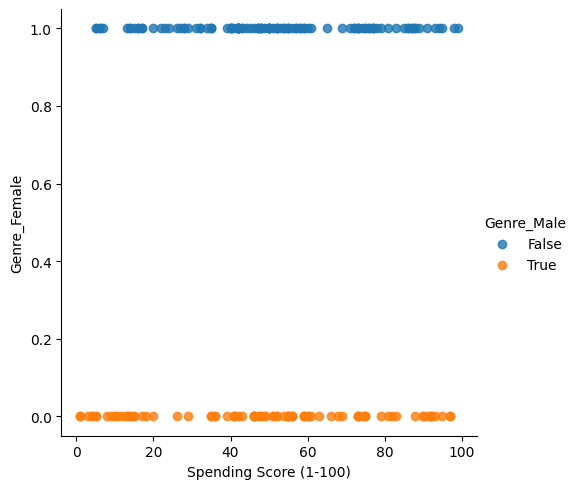

In [9]:
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],
                 fit_reg=False,legend=True,legend_out=True)